<div class="alert alert-block alert-warning">

# Wichtige Hinweise
**Bitte lesen Sie folgende Hinweise sorgfältig**

- Dies ist das Übungsblatt. Lösen Sie dieses erst, wenn Sie das Beispiels-Blatt (3a) gelesen und gelöst haben!
- Öffen Sie sowohl dieses Blatt wie auch das Beisipels-Blatt nebeneinander, damit Sie sich für die Aufgaben an den Beispielen orientieren können (falls Sie Hilfe benötigen, wenden Sie sich an Herrn Wendl).
- Lesen Sie den gesamten Text aufmerksam und vervollständigen Sie jeden Code-Block in dieser Datei.
</div>

<div class="alert alert-block alert-success">

Viel Erfolg beim Lösen der Übungen! :)
</div>

In [1]:
# benötigte Bibliotheken importieren
import pandas as pd # pandas für Datenmanipulation
import matplotlib.pyplot as plt  # matplotlib für Datenvisualisierung
plt.style.use('ggplot')  # ggplot-Stil für Diagramme verwenden
import statsmodels.formula.api as smf # statsmodels für statistische Modelle, insbesondere OLS

# Einfache lineare Regression

In [4]:
# Aufgabe 1: Daten einlesen
# Lesen Sie die CSV-Datei "Data/police_crime.csv" ein und speichern Sie sie in einem DataFrame. Zeigen Sie die ersten 5 Zeilen des DataFrames an.
# IHR CODE HIER
df = pd.read_csv("../Data/police_crime.csv")
df.head()

,Polizeistreifen,Straftaten
0,5,5.915402
1,4,4.328751
2,4,3.470240
3,5,5.513267
4,5,5.097078


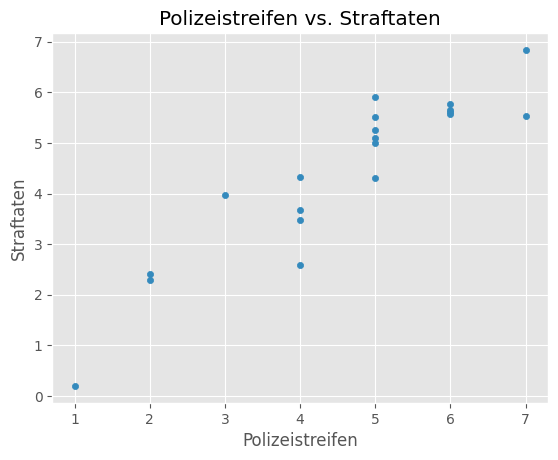

In [5]:
# Aufgabe 2: Zeigen Sie die Polizeistreifen und die Straftaten in einem Streudiagramm an.
df.plot.scatter(x='Polizeistreifen', y='Straftaten', title='Polizeistreifen vs. Straftaten')
plt.xlabel('Polizeistreifen')
plt.ylabel('Straftaten')
plt.show()


Wir wollen hier die Anzahl Polizeistreifen nutzen, um die Anzahl Straftaten vorherzusagen. Welches sind die abhängige und unabhängige Variable in diesen Daten?

**Antwort**:
- *Unabhängige Variable*: Polizeistreifen
- *Abhängige Variable*: Straftaten

Erkennen Sie einen linearen Trend (= eine lineare Tendenz) in diesen Daten?

**Antwort**: Je mehr Polizeistreifen, desto mehr Straftaten. Die Korrelation ist positiv (was jedoch nichts über Kausalität aussagt).

Finden Sie eine optimale Regressionslinie für die Daten, indem Sie eine lineare Regression mit `statsmodels` durchführen. Verwenden Sie die Formel `Polizeistreifen ~ Straftaten`, um die Beziehung zwischen der Anzahl der Polizeistreifen und der Anzahl der Straftaten zu modellieren.

In [7]:
# Lineares Regressionsmodell mit statsmodels erstellen
model = smf.ols('Polizeistreifen ~ Straftaten', data=df).fit()
print(model.params)

Intercept     0.464215
Straftaten    0.929416
dtype: float64


Zeichnen Sie ein weiteres Streudiagramm *mit Regressionslinie*

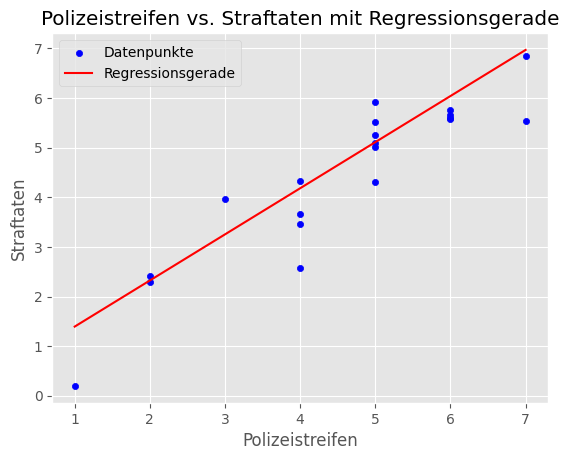

In [9]:
# Datenpunkte als Streudiagramm zeichnen
ax = df.plot.scatter(x="Polizeistreifen", y="Straftaten", label="Datenpunkte", color="blue")

# Regressionsgerade berechnen und zeichnen
m = model.params['Straftaten']
q = model.params['Intercept']
x_values = [df["Polizeistreifen"].min(), df["Polizeistreifen"].max()]
y_values = [m * x + q for x in x_values]  # vorhergesagte y-Werte für min/max Polizeistreifen

plt.plot(x_values, y_values, color="red", label="Regressionsgerade")
plt.xlabel("Polizeistreifen")
plt.ylabel("Straftaten")
plt.legend()
plt.title("Polizeistreifen vs. Straftaten mit Regressionsgerade")
plt.show()

Sagen Sie voraus, wie viele Strattaten entdeckt werden bei 6 Polizeikontrollen.

In [10]:
# Vorhersage der Straftaten bei 6 Polizeikontrollen
polizeistreifen = 6
straftaten_vorhersage = m * polizeistreifen + q
print(f"Vorhergesagte Straftaten bei {polizeistreifen} Polizeikontrollen: {straftaten_vorhersage:.2f}")

Vorhergesagte Straftaten bei 6 Polizeikontrollen: 6.04


## Aufgabe 2: CO₂-Ausstoss von Autos vorhersagen

Wenn man für die lineare Regression zwei oder mehr unabhängige Variablen verwendet, spricht man von **multipler linearer Regression**. Bei $n$ verschiedenen unabhängigen Varialben $x_1, x_2, \ldots, x_n$ wird zur Modellierung eine lineare Funktion vom Typ $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$ verwendet. Statt einer Geraden repräsentiert sie eine *Ebene* in einem mehrdimensioanlen Raum (=Hyperebene).

Für diese Aufgabe analysieren wir den Datensatz über [Autos und CO₂-Ausstoss von W3Schools](https://www.w3schools.com/python/python_ml_multiple_regression.asp).Der Datensatz `Data/cars-co2.csv` enthält Informationen über verschiedene Autos, darunter den CO₂-Ausstoss (in g/km) und verschiedene Merkmale wie Markennamen, Gewicht und Volumen. Ziel ist es, den CO₂-Ausstoss anhand dieser Merkmale vorherzusagen. Über die unabhängigen Variablen `Weight` (=Gewicht) und `Volume` (=Volume) soll also der CO₂-Ausstoss `CO2` (abhängige Variable) vorhergesagt werden.



**a)** Laden Sie den Datensatz `Data/cars-co2.csv` in einen DataFrame und zeigen Sie die ersten 5 Zeilen an.`

In [12]:
cars_df = pd.read_csv("../Data/cars-co2.csv")
cars_df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


**b)** überprüfen Sie für jede unabhängige Variable separat, ob sie in einem linearen Zusammenhang zur abhängigen Variable `CO2` steht, indem Sie für jede unabhängige Variable ein Streudiagramm erstellen.

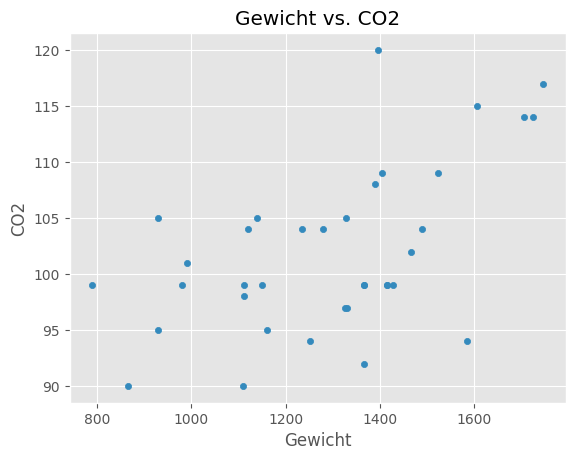

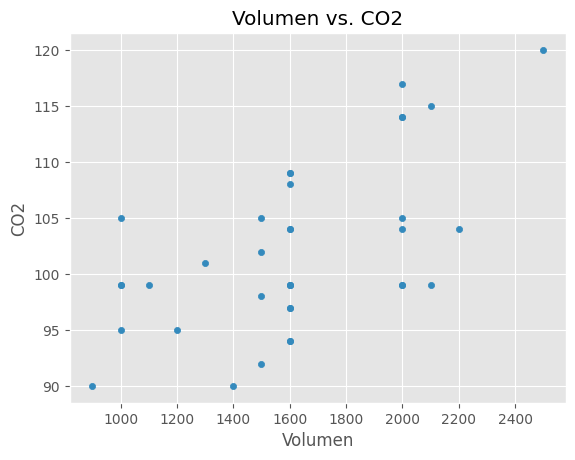

In [13]:
# Streudiagramm für Gewicht vs. CO2
cars_df.plot.scatter(x='Weight', y='CO2', title='Gewicht vs. CO2')
plt.xlabel('Gewicht')
plt.ylabel('CO2')
plt.show()

# Streudiagramm für Volumen vs. CO2
cars_df.plot.scatter(x='Volume', y='CO2', title='Volumen vs. CO2')
plt.xlabel('Volumen')
plt.ylabel('CO2')
plt.show()

Erstellen Sie mit Hilfe von statsmodels ein lineares Modell. Gibt es mehr als eine unabhängige Variable, werden sie im Schlüssel-Argument `formula` von `ols()` mit `+` verbunden, also z.B. `'CO2 ~ weight + volume'`.

In [15]:
# Lineares Regressionsmodell mit zwei unabhängigen Variablen (Weight und Volume) erstellen
co2_model = smf.ols('CO2 ~ Weight + Volume', data=cars_df).fit()
print(co2_model.params)

Intercept    79.694719
Weight        0.007551
Volume        0.007805
dtype: float64


Welche Parameter findet das Modell?

**Antwort**: 3 Parameter (Achsenabschnitt $a_0$ (`Intercept`) sowie $a_1$ (`Weight`) und $a_2$ (`Volume`))

Wie viel CO2 wird bei einem Gewicht von 2000 und einem Volumen von 1000 emittiert?


In [16]:
# Vorhersage des CO2-Ausstoßes bei Gewicht=2000 und Volumen=1000
gewicht = 2000
volumen = 1000
co2_vorhersage = co2_model.params['Intercept'] + co2_model.params['Weight'] * gewicht + co2_model.params['Volume'] * volumen
print(f"Vorhergesagter CO2-Ausstoß bei Gewicht={gewicht} und Volumen={volumen}: {co2_vorhersage:.2f}")

Vorhergesagter CO2-Ausstoß bei Gewicht=2000 und Volumen=1000: 102.60


<div class="alert alert-block alert-info">
<strong>Kontrollfragen</strong>

1. Was versteht man unter der *abhängigen* Variablen? 
2. Was versteht man unter *unabhängigen* Variablen?
3. Was ist der Unterschied zwischen der *einfachen* linearen Regression und der *multiplen* linearen Regression?
4. Weshalb muss man die *Linearität* der unabhängigen Variablen überprüfen? Und wie macht man das?
5. Wozu verwendet man die Programmbibliothek *pandas*?
6. Wozu verwendet man die Programmbibliothek *statsmodels*?
7. Was versteht man unter einem statistischen Modell?
</div>

<div class="alert alert-block alert-warning">
<strong>🏆 Challenge-Aufgabe: Weitere Modelle</strong>

Manchmal stehen Daten auch nicht in einem linearen Zusammenhang, sondern sind beispielsweise polynomisch verteilt, wie z.B. hier:

<div style="display: flex; flex-direction: column; width:60%; margin-left: 20%; margin-right: 20%;">

![Polynomial Regression](../Images/polynomial_regression.png)
</div>


Schauen Sie sich dazu dieses [Tutorial](https://www.w3schools.com/python/python_ml_polynomial_regression.asp) an und erstellen Sie selber eine polynomiale Regression, indem Sie den Code in den Zellen untenan einfügen.
</div>

In [ ]:
# IHR CODE HIER

<div class="alert alert-block alert-warning">
<strong>🏆 Challenge-Aufgabe: Jupyter Notebook</strong>

Lernen Sie, wie man effizient mit Jupyter Notebooks arbeitet. Schauen Sie sich herzu die Dokumentation zu den Shortcuts an: [Jupyter Notebook Shortcuts](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330/).

</div>